# Simpsons and Southpark
## Their First Episodes

*The Simpsons* and *South Park* are two of the best known animated comedies out there. They also couldn't be more different. South Park is known for leaving nothing untouched, and . Along with a crass sense of humor (that has evolved over the years) South Park has been growing in popularity. The Simpsons, has been known for it's focus on the shenanigans of the Simpsons family. The humor is more light hearted, with slight jabs but nothing too cruel. An example of the differences between the two series can be explained by looking at their first episodes.

*The Simpsons* had it's first full length episode aired on December 17th, 1989. Titled, 'Simpsons Roasting on an Open Fire' it starts with Homer Simpson not getting a Christmas Bonus and having to then spend his Christmas money on removing a tattoo his son, Bart got. As Christmas Eve comes to a close he goes to bet on the dog races and instead ends up adopting one of the racing dogs with his family. 

*South Park*'s first episode, 'Cartman Gets an Anal Probe' involves one of the characters, Cartman, having an anal probe that communicates with a UFO, another character, Kyle, has his brother kidnapped by the same aliens. It involes flammable farts, death, and as the title suggests, anal probes.

The reason these two episodes are so interesting to explore with NLP is because they are both known for being referenced through the culture war. South Park was the antithesis of this culture war, focused on being offensive. The Simpsons, by contrast, is about a family trying to do right as they go through trials. Although later episodes of the Simposons would be criticized by 

In [28]:
simpsons_url= "http://simpsons-scripts.wikidot.com/simpsons-roasting-on-an-open-fire"
southpark_url = 'http://southpark.wikia.com/wiki/Cartman_Gets_an_Anal_Probe/Script'

In [48]:
simpsons_xpath = "/html/body[@id='html-body']/div[@id='skrollr-body']/div[@id='container-wrap-wrap']/div[@id='container-wrap']/div[@id='container']/div[@id='content-wrap']/div[@id='main-content']/div[@id='page-content']/p//text()"
southpark_dialog_xpath = "//tr/td/text()"
southpark_speaker_xpath = "//tr/th/text()"

In [30]:
import requests
from lxml import html

simpsons = requests.get(simpsons_url)
southpark = requests.get(southpark_url)

In [31]:
simpsons_tree = html.fromstring(simpsons.content)
southpark_tree = html.fromstring(southpark.content)

# grab the scripts using the above xpaths.
simpsons = simpsons_tree.xpath(simpsons_xpath)

In [57]:
len(southpark_tree.xpath("//tr/td/text()"))
len(southpark_tree.xpath(soutpark_speaker_xpath))

421

In [17]:
speakers = [x.strip().replace(':',"") for x in simpsons if x.strip()[-1] == ':']
dialog = [simpsons[i+1].strip() for i in range(len(simpsons)) if simpsons[i][-1] == ':'] 

In [18]:
import pandas as pd

In [19]:
simpsons_script = pd.DataFrame({'dialog' : dialog, 'speaker' : speakers,})

In [20]:
simpsons_script.speaker.value_counts()

Homer          107
Bart            47
Marge           41
Patty           17
Lisa            15
Barney           8
Lady             8
Flanders         7
Selma            6
All              5
Teacher          5
Man              5
Grandpa          3
Announcer        3
Doctor           3
Skinner          3
Manager          3
Boy              2
Todd             2
Moe              2
Girl             2
Milhouse         2
Clerk            2
Class            2
Dad              1
Mr. Largo        1
Bart & Lisa      1
Kid              1
Lewis            1
Mr. Burns        1
Smithers         1
Name: speaker, dtype: int64

In [21]:
from textblob import TextBlob

In [22]:
simpsons_script['polarity'] = simpsons_script.apply(lambda x: TextBlob(x['dialog']).sentiment.polarity, axis=1)
simpsons_script['subjectivity'] = simpsons_script.apply(lambda x: TextBlob(x['dialog']).sentiment.subjectivity, axis=1)

In [23]:
simpsons_script.head()

,dialog,speaker,polarity,subjectivity
0,"Ooh! Careful, Homer!",Marge,-0.125,1.000
1,There's no time. We're late.,Homer,-0.300,0.600
2,How still we see the elie…,Class,0.000,0.000
3,Sorry. Excuse me. Pardon me. Sorry. Excuse me.,Marge,-0.275,0.525
4,"Hey, Norman, how's it goin'? So you got dragge...",Homer,0.000,0.000


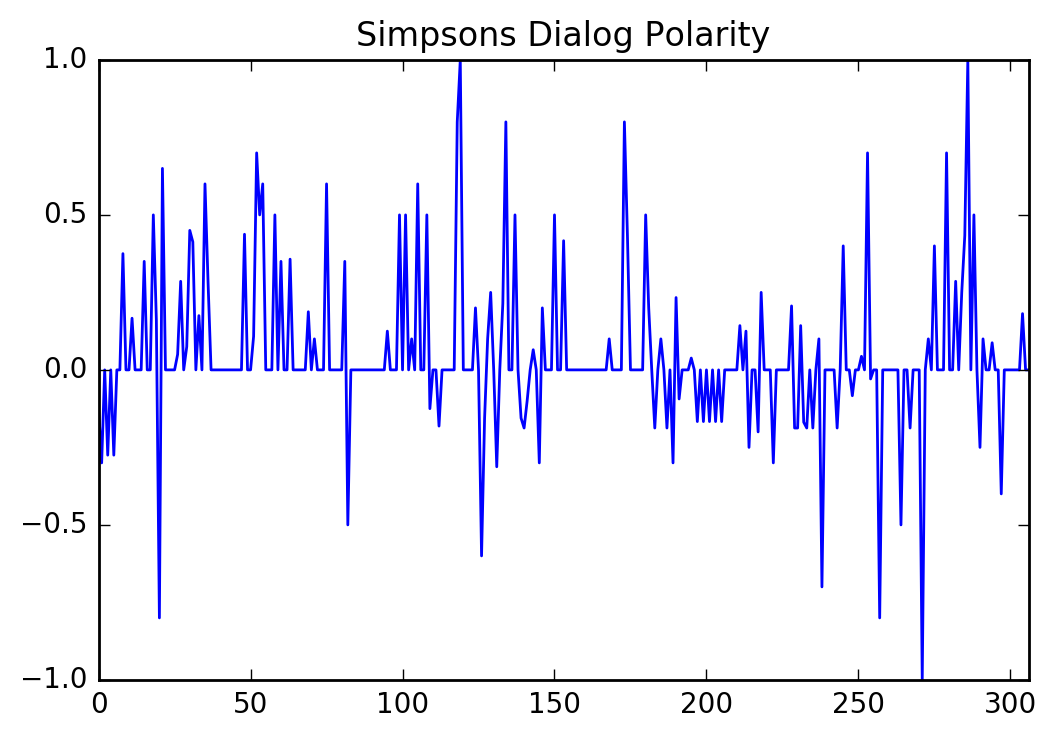

In [24]:
simpsons_pol = simpsons_script['polarity'].plot(title='Simpsons Dialog Polarity')

As in a usual conversation it might be a little too granular to rely on a single line of dialog to reflect the overall cadence. Because of that it is useful to consider a rolling mean of the polarity of conversation to determine how the tone shifts that of the episode. 

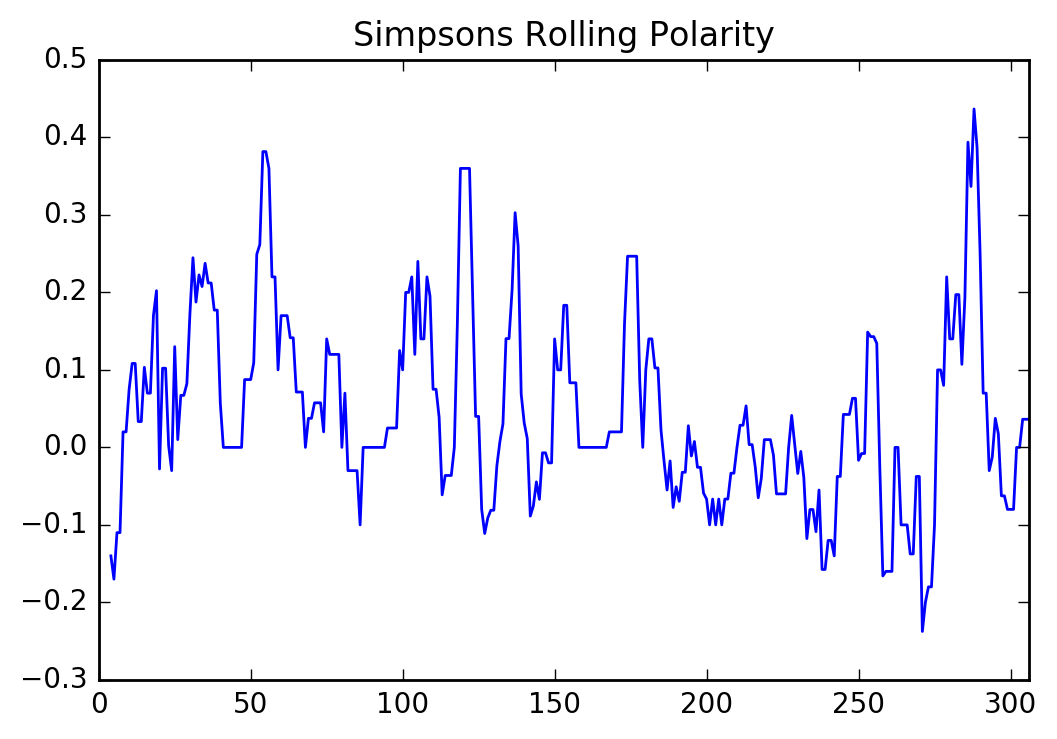

In [25]:
simpsons_roll_pol = simpsons_script['polarity'].rolling(window=5, 
                                    center=False).mean().plot(
                                    title='Simpsons Rolling Polarity')

Now in comparison to South Park:

In [32]:
southpark = southpark_tree.xpath(southpark_dialog_xpath)

In [33]:
southpark

[]